In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
MKT = pd.read_excel("/content/MKT.xlsx")

In [8]:
MKT.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [9]:
MKT.dtypes

,0
youtube,float64
facebook,float64
newspaper,float64
sales,float64


In [10]:
MKT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [12]:
MKT[["youtube", "facebook", "newspaper", "sales"]].describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [13]:
MKT_total = pd.DataFrame({'Tipo': MKT.columns, 'Total': MKT.sum()})
MKT_total.reset_index(inplace=True)
MKT_total = MKT_total[['Tipo', 'Total']]
MKT_total

,Tipo,Total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04
3,sales,2893.80


**ETAPA 1 -**
Com base nas informações apresentadas acima, temos uma tabela composta de 4 colunas e 171 linhas não-nulas. Os números estão em decimais (float). Para cada tipo de publicidade, temos os valores investidos; já na coluna Sales, temos o valor em venda gerado pelas publicidades.

Text(0.5, 1.0, 'Variação de Investimento vs. Vendas')

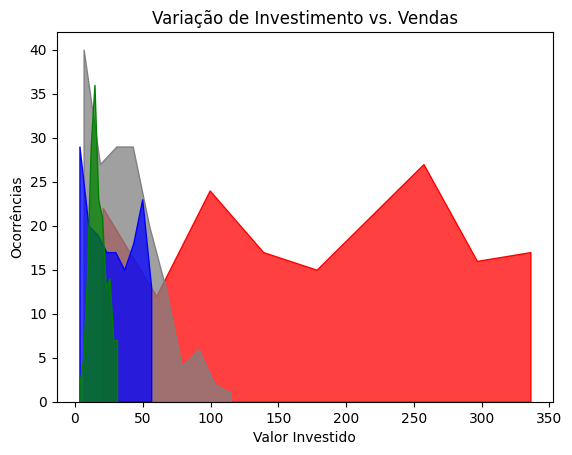

In [18]:
sns.histplot(data=MKT, x="youtube", color="red", element="poly")
sns.histplot(data=MKT, x="newspaper", color="gray", element="poly")
sns.histplot(data=MKT, x="facebook", color="blue", element="poly")
sns.histplot(data=MKT, x="sales", color="green", element="poly")
plt.ylabel("Ocorrências")
plt.xlabel("Valor Investido")
plt.title("Variação de Investimento vs. Vendas")

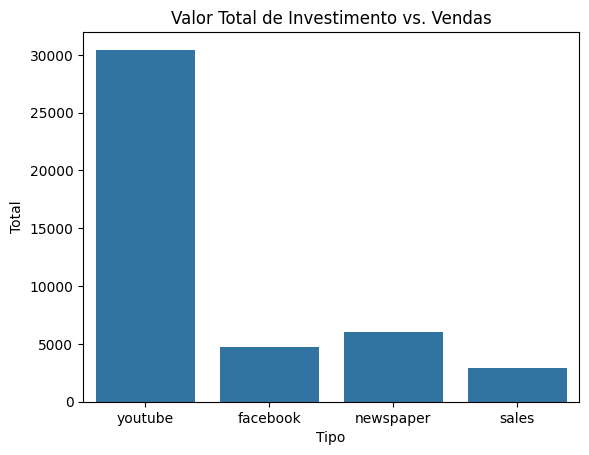

In [19]:
sns.barplot(data=MKT_total, x='Tipo', y='Total');
plt.title("Valor Total de Investimento vs. Vendas");

**ETAPA 2** - Os gráficos e a descrição dos dados indicam que os custos do Youtube estão fora da realidade, pois estão muito acima da receita apresentada, o que leva a crer que o nome das colunas foram trocados em algum momento. Sendo assim, trataremos os dados na sequência.  


In [20]:
MKT = MKT.rename(columns={'youtube': 'sales', 'facebook': 'youtube', 'newspaper': 'facebook', 'sales': 'newspaper'})
MKT.head()

,sales,youtube,facebook,newspaper
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [21]:
MKT_alt = MKT
MKT_alt['investimento'] = MKT_alt['youtube'] + MKT_alt['facebook'] + MKT_alt['newspaper']
MKT_alt.head()

,sales,youtube,facebook,newspaper,investimento
0,84.72,19.20,48.96,12.60,80.76
1,351.48,33.96,51.84,25.68,111.48
2,135.48,20.88,46.32,14.28,81.48
3,116.64,1.80,36.00,11.52,49.32
4,318.72,24.00,0.36,20.88,45.24


In [22]:
MKT_alt['ROI'] = round((MKT_alt['sales'] - MKT_alt['investimento']) / MKT_alt['investimento'], 2)
MKT_alt.head()

,sales,youtube,facebook,newspaper,investimento,ROI
0,84.72,19.20,48.96,12.60,80.76,0.05
1,351.48,33.96,51.84,25.68,111.48,2.15
2,135.48,20.88,46.32,14.28,81.48,0.66
3,116.64,1.80,36.00,11.52,49.32,1.36
4,318.72,24.00,0.36,20.88,45.24,6.05


In [24]:
MKT_total = pd.DataFrame({'Tipo': MKT_alt.columns, 'Total': MKT_alt.sum()})
MKT_total.drop(['ROI'], axis=0, inplace=True)
MKT_total.reset_index(inplace=True)
MKT_total = MKT_total[['Tipo', 'Total']]
MKT_total

,Tipo,Total
0,sales,30441.60
1,youtube,4731.84
2,facebook,6026.04
3,newspaper,2893.80
4,investimento,13651.68


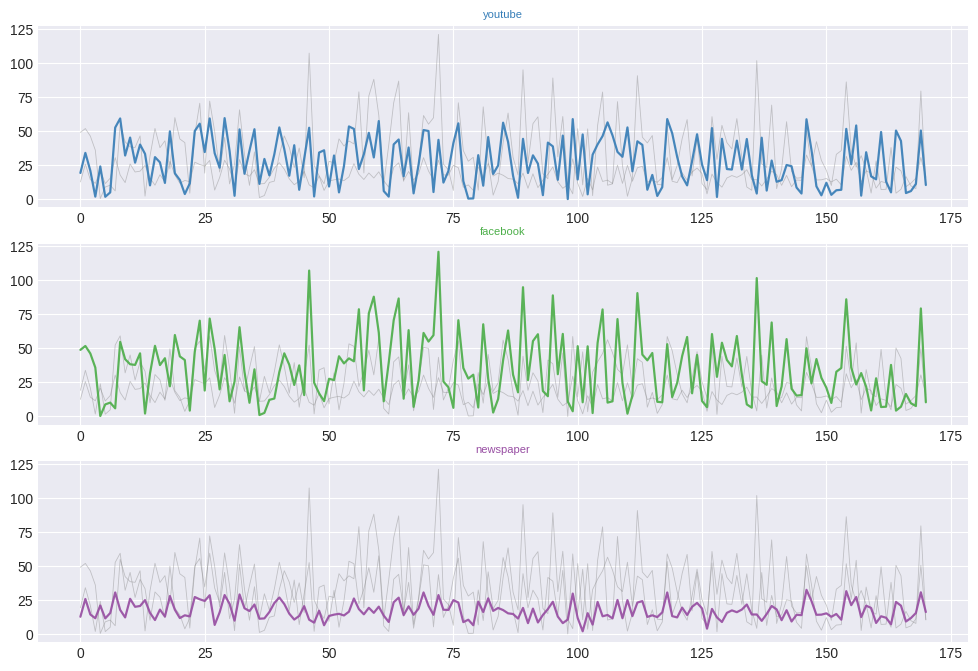

In [25]:
# Gráfico de linha por tipo de investimento:
multi = MKT_alt[['youtube', 'facebook', 'newspaper']]
plt.figure(figsize=(12,8))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
num = 0
for col in multi:
  num += 1
  plt.subplot(3, 1, num)
  for v in multi:
    plt.plot(multi.index, multi[v], marker='', color='grey', linewidth=0.6, alpha=0.4)
  plt.plot(multi.index, multi[col], marker='', color=palette(num), linewidth=1.6, alpha=0.9, label=col)
  plt.title(col, loc='center', fontsize=8, fontweight=0, color=palette(num))
plt.show();

In [26]:
MKT_alt.corr()

,sales,youtube,facebook,newspaper,investimento,ROI
sales,1.000000,0.086538,0.110759,0.782030,0.242053,0.630784
youtube,0.086538,1.000000,0.293425,0.602918,0.759873,-0.456183
facebook,0.110759,0.293425,1.000000,0.254987,0.831638,-0.422037
newspaper,0.782030,0.602918,0.254987,1.000000,0.614250,0.160420
investimento,0.242053,0.759873,0.831638,0.614250,1.000000,-0.462523
ROI,0.630784,-0.456183,-0.422037,0.160420,-0.462523,1.000000


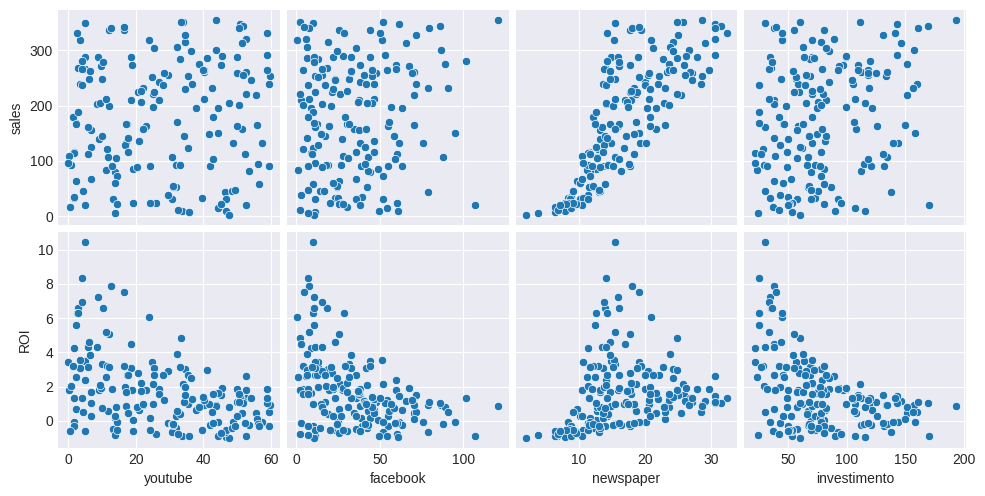

In [27]:
sns.pairplot(MKT_alt, x_vars=['youtube', 'facebook', 'newspaper', 'investimento'], y_vars=['sales', 'ROI']);

<Axes: >

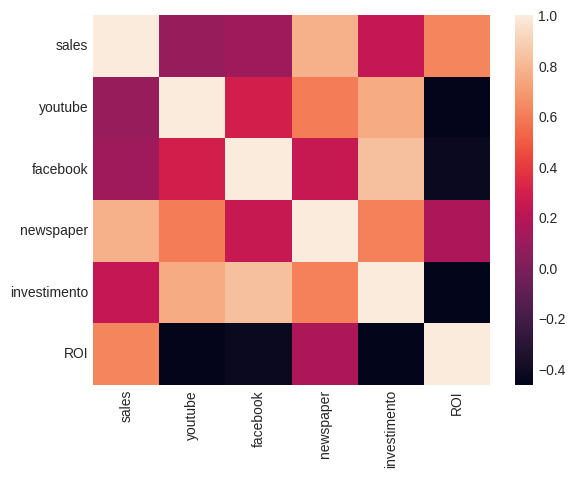

In [28]:
sns.heatmap(MKT_alt.corr())

Analisando os mapa de calor, podemos concluir que o investimento em mídias digitais não causa impacto relevante nas vendas; diferente da relação dos jornais com as vendas.

**ETAPA 3 ** - Modelagem em regressão simples

In [29]:
X = MKT_alt[['youtube', 'facebook', 'newspaper']]
Y = MKT_alt['sales']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=22)

In [37]:
regL = LinearRegression()
regL.fit(X_train, Y_train)

LinearRegression()

In [38]:
model_teste = regL.predict(X_test)

In [39]:
acuracia = r2_score(Y_test, model_teste)
print(f'A acurácia deste modelo é de {round(acuracia*100)}%.')

A acurácia deste modelo é de 91%.
